In [27]:
pip install lxml


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 1.1 MB/s  0:00:07m 1.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import calendar
import pandas as pd

station_id = 27037
start = "2017-01-01"
end   = "2020-12-31"

all_parts = []

for p in pd.period_range(start=start, end=end, freq="M"):
    year = int(p.year)
    month = int(p.month)
    last_day = calendar.monthrange(year, month)[1]

    url = (
        "https://www.pogodaiklimat.ru/weather.php"
        f"?id={station_id}&bday=1&fday={last_day}&amonth={month}&ayear={year}&bot=2"
    )

    tables = pd.read_html(url)

    left = min(tables, key=lambda t: t.shape[1])
    right = max(tables, key=lambda t: t.shape[1])

    df = pd.concat([left.reset_index(drop=True), right.reset_index(drop=True)], axis=1)
    df = df.rename(columns={df.columns[0]: "time_raw"})

    df["year"] = year
    df["month"] = month

    all_parts.append(df)

df_all = pd.concat(all_parts, ignore_index=True)

df_all.head()

,time_raw,1,time_raw,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,year,month
0,"Время (UTC),\tдата","Время (UTC),\tдата","Ветер (напр.,м/с)","Ветер (напр.,м/с)",Видим.,Явления,Облачность,Т (С),Тd (С),f (%),...,Комфортность,P (гПа),Po (гПа),Тmin (С),Tmax (С),R (мм),R24 (мм),S (см),2017,1
1,00,1.01,З,2,20 км,{дождь},9/9 900 м [Sc],+2.6,+0.8,88,...,тепло,993.6,977.7,NaN,NaN,NaN,NaN,NaN,2017,1
2,03,1.01,З,4,10 км,слаб. дождь,10/10 720 м [Sc],+2.6,-0.1,82,...,тепло,993.1,977.2,+1.8,NaN,0.1,NaN,26,2017,1
3,06,1.01,З,2 {10},20 км,{дождь},10/10 450 м [Sc],+1.6,-0.6,85,...,тепло,993.6,977.6,+1.5,NaN,NaN,NaN,NaN,2017,1
4,09,1.01,З,4,20 км,NaN,10/10 800 м [Sc],+2.3,-1.4,77,...,тепло,993.8,977.8,NaN,NaN,NaN,NaN,NaN,2017,1


In [3]:
df_all


,time_raw,1,time_raw,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,year,month
0,"Время (UTC),\tдата","Время (UTC),\tдата","Ветер (напр.,м/с)","Ветер (напр.,м/с)",Видим.,Явления,Облачность,Т (С),Тd (С),f (%),...,Комфортность,P (гПа),Po (гПа),Тmin (С),Tmax (С),R (мм),R24 (мм),S (см),2017,1
1,00,1.01,З,2,20 км,{дождь},9/9 900 м [Sc],+2.6,+0.8,88,...,тепло,993.6,977.7,NaN,NaN,NaN,NaN,NaN,2017,1
2,03,1.01,З,4,10 км,слаб. дождь,10/10 720 м [Sc],+2.6,-0.1,82,...,тепло,993.1,977.2,+1.8,NaN,0.1,NaN,26,2017,1
3,06,1.01,З,2 {10},20 км,{дождь},10/10 450 м [Sc],+1.6,-0.6,85,...,тепло,993.6,977.6,+1.5,NaN,NaN,NaN,NaN,2017,1
4,09,1.01,З,4,20 км,NaN,10/10 800 м [Sc],+2.3,-1.4,77,...,тепло,993.8,977.8,NaN,NaN,NaN,NaN,NaN,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11727,09,31.12,ЮВ,4,4000 м,ледяной дождь (гололёд) {снег} [диам. гололёда...,10/8 360 м [Frnb As op],-5.7,-7.4,88,...,по сезону,1021.8,1005.0,NaN,NaN,NaN,NaN,NaN,2020,12
11728,12,31.12,ЮВ,4,20 км,"{снег, дождь} [диам. гололёда 1 мм]",10/8 450 м [Frnb As op],-5.2,-7.2,86,...,по сезону,1020.7,1003.9,NaN,NaN,NaN,NaN,NaN,2020,12
11729,15,31.12,ЮВ,3,20 км,снежные кристаллы [диам. гололёда 1 мм],10/8 300 м [Frnb As op],-5.0,-6.7,88,...,по сезону,1020.0,1003.2,NaN,-5.0,3,NaN,NaN,2020,12
11730,18,31.12,ЮВ,3,20 км,{снег},10/8 240 м [Frnb As op],-4.6,-6.0,90,...,по сезону,1019.3,1002.6,NaN,NaN,NaN,NaN,NaN,2020,12


In [5]:
df = df_all.copy()

df = df.iloc[1:].reset_index(drop=True)

In [7]:
import numpy as np
import pandas as pd

# 1) индексы дублей
time_raw_idxs = np.flatnonzero(df.columns == "time_raw")
one_idxs      = np.flatnonzero(df.columns == 1)

idx_hour = time_raw_idxs[0]   # час
idx_date = one_idxs[0]        # дата дд.мм
idx_wind_speed = one_idxs[1]  # скорость ветра

# 2) собираем нужные колонки
df_weather = df.iloc[:, [
    idx_hour,
    idx_date,
    idx_wind_speed,
    df.columns.get_loc(5),    # T
    df.columns.get_loc(7),    # f
    # df.columns.get_loc(13),   # Tmin
    # df.columns.get_loc(14),   # Tmax
    # df.columns.get_loc(16),   # R24
    df.columns.get_loc("year")
]].copy()

df_weather.columns = ["hour_utc", "date_dm", "wind_speed", "T", "f", "year"]

df_weather.head()

,hour_utc,date_dm,wind_speed,T,f,year
0,00,1.01,2,+2.6,88,2017
1,03,1.01,4,+2.6,82,2017
2,06,1.01,2 {10},+1.6,85,2017
3,09,1.01,4,+2.3,77,2017
4,12,1.01,2,+1.8,78,2017


In [ ]:
df_weather

In [9]:

dfw = df_weather.copy()


dfw["dt"] = pd.to_datetime(
    dfw["year"].astype(str) + "-" + dfw["date_dm"].str.split(".").str[1].str.zfill(2) + "-" +
    dfw["date_dm"].str.split(".").str[0].str.zfill(2) + " " +
    dfw["hour_utc"].astype(str).str.zfill(2) + ":00:00",
    errors="coerce"
)

dfw = dfw.dropna(subset=["dt"]).sort_values("dt").set_index("dt")

In [11]:
dfw = dfw.drop(['hour_utc', 'date_dm', 'year'], axis=1)

In [13]:
dfw["wind_speed"] = (
    dfw["wind_speed"]
    .astype(str)
    .str.extract(r"(\d+)", expand=False)
    .astype(float)
)

In [15]:
dfw['T'] = dfw['T'].astype(float)
dfw['f'] = dfw['f'].astype(float)

In [17]:
dfw

,wind_speed,T,f
dt,,,
2017-01-01 00:00:00,2.0,2.6,88.0
2017-01-01 03:00:00,4.0,2.6,82.0
2017-01-01 06:00:00,2.0,1.6,85.0
2017-01-01 09:00:00,4.0,2.3,77.0
2017-01-01 12:00:00,2.0,1.8,78.0
...,...,...,...
2020-12-31 09:00:00,4.0,-5.7,88.0
2020-12-31 12:00:00,4.0,-5.2,86.0
2020-12-31 15:00:00,3.0,-5.0,88.0


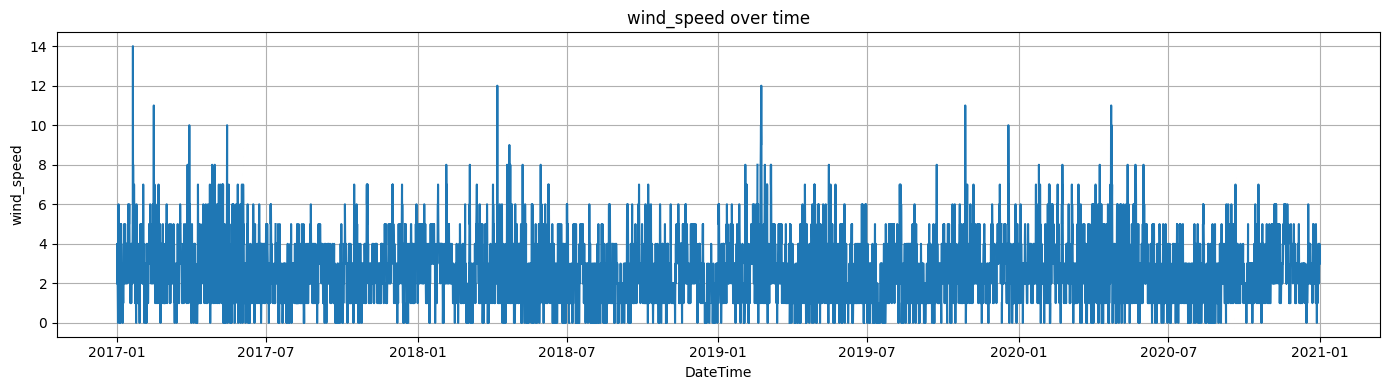

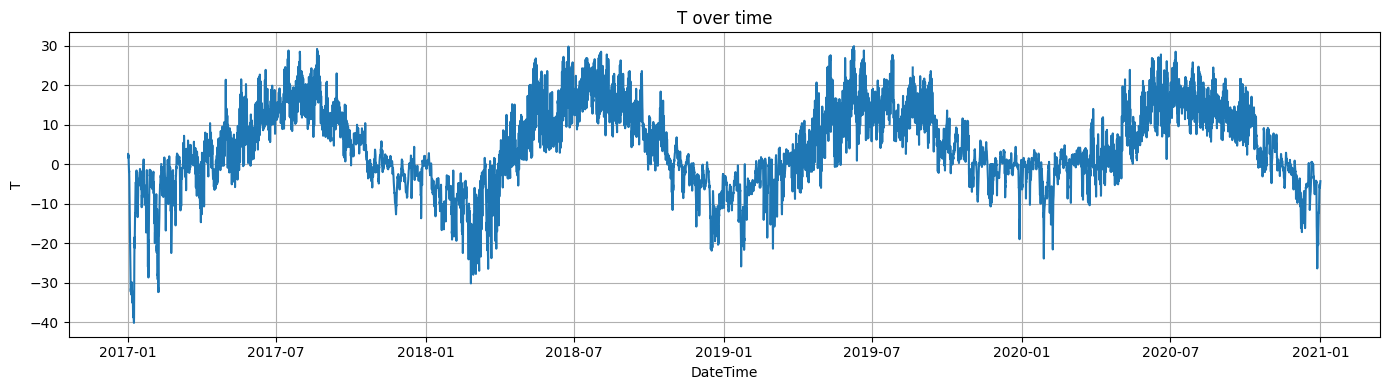

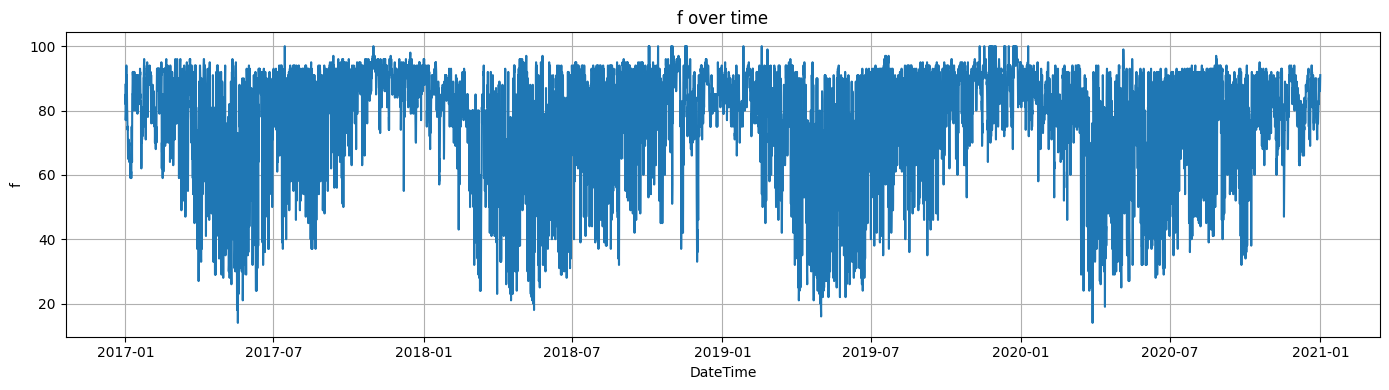

In [19]:
import matplotlib.pyplot as plt

cols = ["wind_speed", "T", "f"]

for col in cols:
    plt.figure(figsize=(14, 4))
    plt.plot(dfw.index, dfw[col])
    plt.title(f"{col} over time")
    plt.xlabel("DateTime")
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [35]:
# гарантируем сортировку
dfw = dfw.sort_index()

# создаём почасовой временной индекс
hourly_index = pd.date_range(
    start=dfw.index.min(),
    end=dfw.index.max().normalize() + pd.Timedelta(hours=23),
    freq="h"
)

# приводим к почасовой сетке + ступенчатое заполнение
dfw_hourly = (
    dfw
    .reindex(hourly_index)
    .ffill()
)

# возвращаем имя индекса
dfw_hourly.index.name = "dt"

In [37]:
dfw_hourly

,wind_speed,T,f
dt,,,
2017-01-01 00:00:00,2.0,2.6,88.0
2017-01-01 01:00:00,2.0,2.6,88.0
2017-01-01 02:00:00,2.0,2.6,88.0
2017-01-01 03:00:00,4.0,2.6,82.0
2017-01-01 04:00:00,4.0,2.6,82.0
...,...,...,...
2020-12-31 19:00:00,3.0,-4.6,90.0
2020-12-31 20:00:00,3.0,-4.6,90.0
2020-12-31 21:00:00,3.0,-4.3,91.0


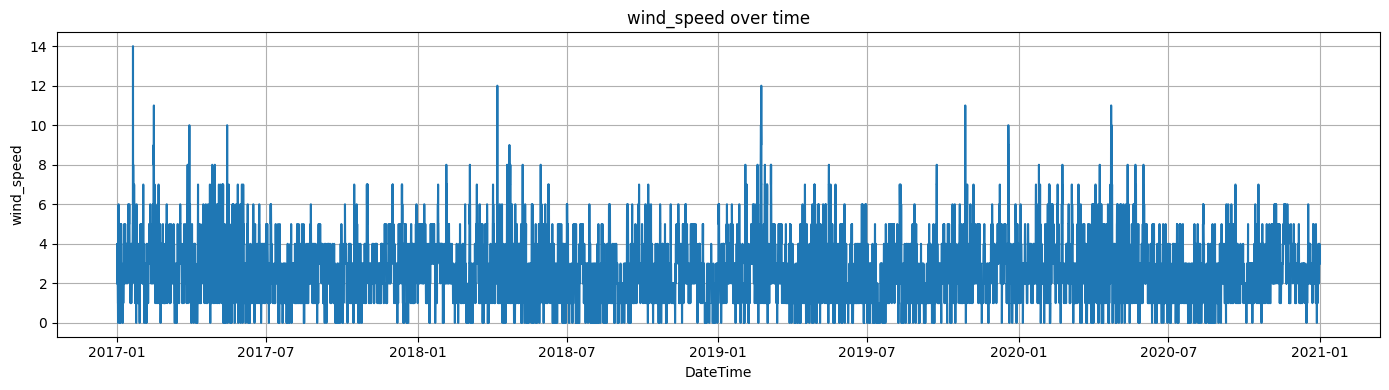

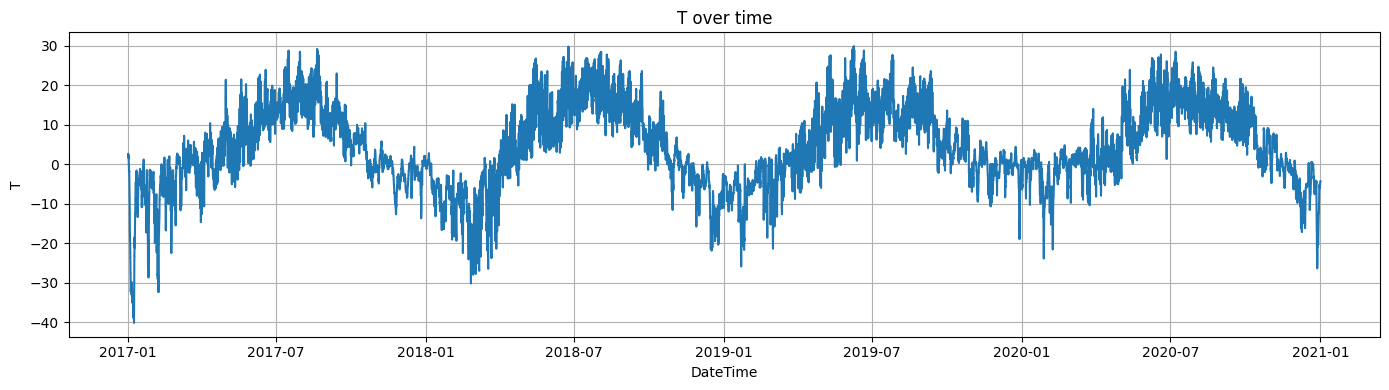

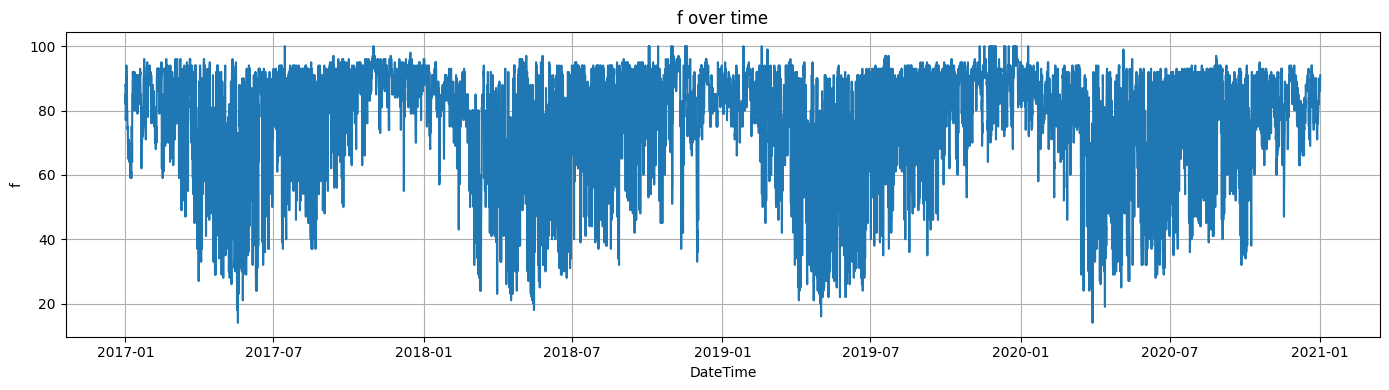

In [39]:

cols = ["wind_speed", "T", "f"]

for col in cols:
    plt.figure(figsize=(14, 4))
    plt.plot(dfw_hourly.index, dfw_hourly[col])
    plt.title(f"{col} over time")
    plt.xlabel("DateTime")
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [41]:
dfw_hourly.isnull().sum()

wind_speed    0
T             0
f             0
dtype: int64

In [43]:
from pathlib import Path

# Путь к файлам с погодными данными (относительно папки notebooks)
weather_parquet_path = Path("..") / "data" / "raw" / "weather_dfw_hourly.parquet"
weather_csv_path = Path("..") / "data" / "raw" / "weather_dfw_hourly.csv"

# Создаём папку при необходимости
weather_parquet_path.parent.mkdir(parents=True, exist_ok=True)

# Сохраняем итоговый датасет dfw_hourly без изменений
dfw_hourly.to_parquet(weather_parquet_path)
dfw_hourly.to_csv(weather_csv_path)

print(f"Файлы сохранены:\n- {weather_parquet_path}\n- {weather_csv_path}")


Файлы сохранены:
- ../data/raw/weather_dfw_hourly.parquet
- ../data/raw/weather_dfw_hourly.csv
